In [1]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [2]:
data_location = 'data/musicDataModel.csv'

In [3]:
songs_features = pd.read_csv(data_location)
songs_features['time_signature'].head()

0    0.251082
1    0.251082
2    0.251082
3   -2.044974
4    0.251082
Name: time_signature, dtype: float64

In [4]:
songs_features.columns

Index(['Unnamed: 0', 'rms', 'zcr', 'tempo_x', 'onset_strength', 'mfcc_1',
       'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8',
       'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'spectral_contrast_1', 'spectral_contrast_2', 'spectral_contrast_3',
       'spectral_contrast_4', 'spectral_contrast_5', 'spectral_contrast_6',
       'spectral_contrast_7', 'artist_pop', 'track_pop', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo_y', 'duration_ms',
       'time_signature', 'valence_tags', 'arousal_tags', 'dominance_tags',
       'genre'],
      dtype='object')

In [5]:
songs_features.dropna(inplace=True)

In [6]:
songs_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16843 entries, 0 to 17638
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16843 non-null  int64  
 1   rms                  16843 non-null  float64
 2   zcr                  16843 non-null  float64
 3   tempo_x              16843 non-null  float64
 4   onset_strength       16843 non-null  float64
 5   mfcc_1               16843 non-null  float64
 6   mfcc_2               16843 non-null  float64
 7   mfcc_3               16843 non-null  float64
 8   mfcc_4               16843 non-null  float64
 9   mfcc_5               16843 non-null  float64
 10  mfcc_6               16843 non-null  float64
 11  mfcc_7               16843 non-null  float64
 12  mfcc_8               16843 non-null  float64
 13  mfcc_9               16843 non-null  float64
 14  mfcc_10              16843 non-null  float64
 15  mfcc_11              16843 non-null  floa

In [7]:
class_counts = songs_features['genre'].value_counts()
class_counts.mean()

np.float64(36.377969762419006)

In [8]:
songs_features.describe()

Unnamed: 0           rms           zcr       tempo_x  onset_strength  \
count  16843.000000  16843.000000  16843.000000  16843.000000    16843.000000   
mean    8812.089533      0.007837      0.001360     -0.001134        0.000412   
std     5105.474472      0.997494      0.998476      0.999731        0.995436   
min        0.000000     -2.589086     -2.434050     -4.297867       -5.310286   
25%     4368.500000     -0.732696     -0.743622     -0.753734       -0.553166   
50%     8817.000000      0.030743     -0.076310     -0.057271       -0.057959   
75%    13232.500000      0.736198      0.656914      0.663919        0.492089   
max    17638.000000      8.607827     12.548061      4.819415        9.378018   

             mfcc_1        mfcc_2        mfcc_3        mfcc_4        mfcc_5  \
count  16843.000000  16843.000000  16843.000000  16843.000000  16843.000000   
mean       0.009541     -0.001077     -0.003214      0.007666     -0.005566   
std        0.994134      0.992260      0.999262      0.993972      0.997095   
min       -7.559682     -6.568267     -4.465196     -7.908819     -3.885042   
25%       -0.580385     -0.628145     -0.706145     -0.496031     -0.685094   
50%        0.142446     -0.040379     -0.091289      0.138370     -0.100210   
75%        0.744054      0.577677      0.612758      0.666242      0.585865   
max        2.856957      5.402557      4.853139      4.822525      6.538246   

       ...  acousticness  instrumentalness      liveness       valence  \
count  ...  16843.000000      16843.000000  16843.000000  16843.000000   
mean   ...     -0.008466         -0.003972      0.002067     -0.000103   
std    ...      0.996611          0.997258      1.002820      0.999189   
min    ...     -0.892671         -0.600802     -1.217865     -1.681337   
25%    ...     -0.861739         -0.600788     -0.607459     -0.850955   
50%    ...     -0.486308         -0.596331     -0.424399     -0.102828   
75%    ...      0.784335          0.208011      0.337828      0.778473   
max    ...      2.127760          2.500941      4.998660      2.168971   

            tempo_y   duration_ms  time_signature  valence_tags  arousal_tags  \
count  16843.000000  16843.000000    16843.000000  16843.000000  16843.000000   
mean      -0.000581      0.004364        0.004750      0.003929     -0.009552   
std        0.999109      0.990452        0.987471      0.996674      0.996890   
min       -4.061384     -2.535021       -8.933145     -3.333210     -3.443475   
25%       -0.765678     -0.557808        0.251082     -0.752313     -0.691428   
50%       -0.029313     -0.158970        0.251082      0.129913     -0.009675   
75%        0.632920      0.360579        0.251082      0.823205      0.717494   
max        3.309424     14.738231        2.547139      1.916876      2.594373   

       dominance_tags  
count    16843.000000  
mean        -0.000752  
std          0.995454  
min         -4.319389  
25%         -0.585777  
50%          0.190111  
75%          0.730718  
max          1.890089  

[8 rows x 43 columns]

In [9]:
# Definir un umbral
threshold = 20

# Obtener las clases que tienen más de `threshold` ejemplos
classes_to_keep = class_counts[class_counts >= threshold].index

# Filtrar el DataFrame para mantener solo las clases que están por encima del umbral
songs_features_filtered = songs_features[songs_features['genre'].isin(classes_to_keep)]

# Mostrar el DataFrame filtrado
print("\nDataFrame filtrado:")
print(songs_features_filtered['genre'].value_counts())



DataFrame filtrado:
genre
indie         1795
rock          1530
pop           1241
electronic     753
folk           574
              ... 
goth            23
nu metal        22
bossa nova      22
nu jazz         21
folk rock       20
Name: count, Length: 105, dtype: int64


In [10]:
X = songs_features_filtered.drop(columns = ['genre', 'Unnamed: 0'])
y = songs_features_filtered['genre']

In [11]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ajustar a todo el conjunto


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

In [12]:
# Listas de columnas numéricas y categóricas
numerical_features = [
    'rms', 'zcr', 'tempo_x', 'onset_strength', 'mfcc_1', 'mfcc_2', 'mfcc_3',
    'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10',
    'mfcc_11', 'mfcc_12', 'mfcc_13', 'spectral_contrast_1', 'spectral_contrast_2',
    'spectral_contrast_3', 'spectral_contrast_4', 'spectral_contrast_5',
    'spectral_contrast_6', 'spectral_contrast_7', 'artist_pop', 'track_pop',
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo_y', 'duration_ms',
    'key', 'mode', 'time_signature', 'valence_tags','arousal_tags','dominance_tags'
]
categorical_features = []


In [13]:
# Preprocesadores para columnas numéricas y categóricas
# Preprocesadores para columnas numéricas y categóricas con imputación
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación de la media para columnas numéricas
    ('scaler', StandardScaler())  # Escalado
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de la moda para columnas categóricas
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación one-hot
])

# ColumnTransformer para aplicar preprocesamiento específico
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [14]:
X_train_processed = preprocessor.fit_transform(X_train)

In [15]:
X_train_processed = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())

In [16]:
X_train_processed.columns

Index(['num__rms', 'num__zcr', 'num__tempo_x', 'num__onset_strength',
       'num__mfcc_1', 'num__mfcc_2', 'num__mfcc_3', 'num__mfcc_4',
       'num__mfcc_5', 'num__mfcc_6', 'num__mfcc_7', 'num__mfcc_8',
       'num__mfcc_9', 'num__mfcc_10', 'num__mfcc_11', 'num__mfcc_12',
       'num__mfcc_13', 'num__spectral_contrast_1', 'num__spectral_contrast_2',
       'num__spectral_contrast_3', 'num__spectral_contrast_4',
       'num__spectral_contrast_5', 'num__spectral_contrast_6',
       'num__spectral_contrast_7', 'num__artist_pop', 'num__track_pop',
       'num__danceability', 'num__energy', 'num__loudness', 'num__speechiness',
       'num__acousticness', 'num__instrumentalness', 'num__liveness',
       'num__valence', 'num__tempo_y', 'num__duration_ms', 'num__key',
       'num__mode', 'num__time_signature', 'num__valence_tags',
       'num__arousal_tags', 'num__dominance_tags'],
      dtype='object')

In [17]:
basic_audio_features = ['num__rms', 'num__zcr', 'num__tempo_x', 'num__onset_strength', 'num__tempo_y', 'num__loudness']
mfcc_features = [f'num__mfcc_{i}' for i in range(1, 14)]
spectral_contrast_features = [f'num__spectral_contrast_{i}' for i in range(1, 8)]
popularity_rhythm_features = ['num__artist_pop', 'num__track_pop', 'num__danceability', 'num__energy', 'num__key', 'num__mode',
                              'num__speechiness', 'num__acousticness', 'num__instrumentalness', 'num__liveness', 'num__valence',
                              'num__duration_ms', 'num__time_signature']
tags_genre = ['num__valence_tags', 'num__arousal_tags', 'num__dominance_tags']


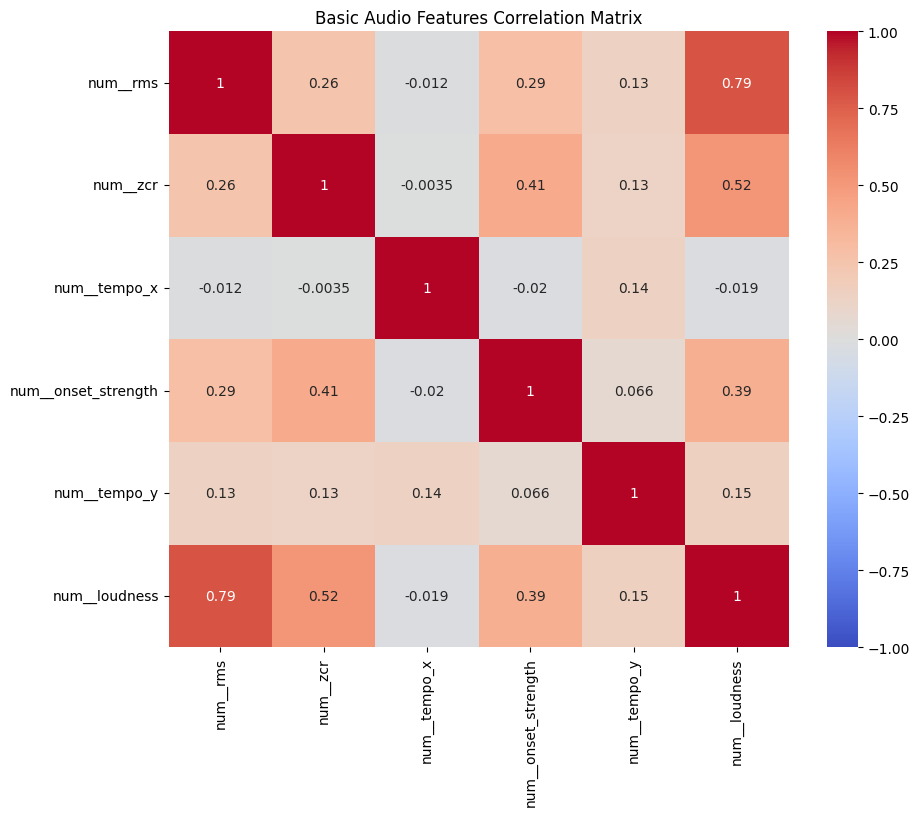

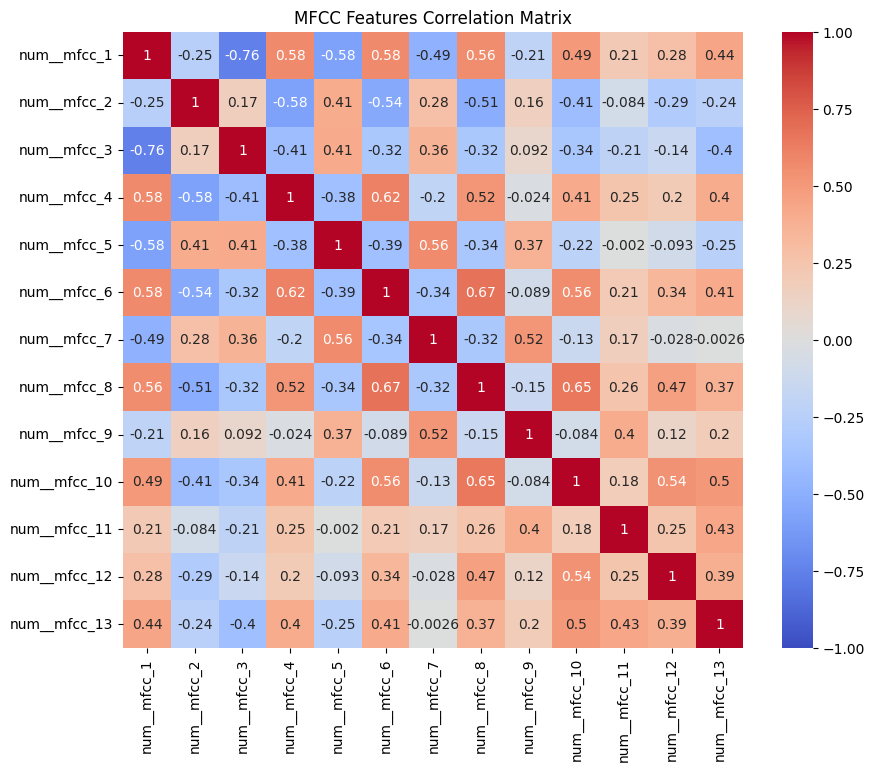

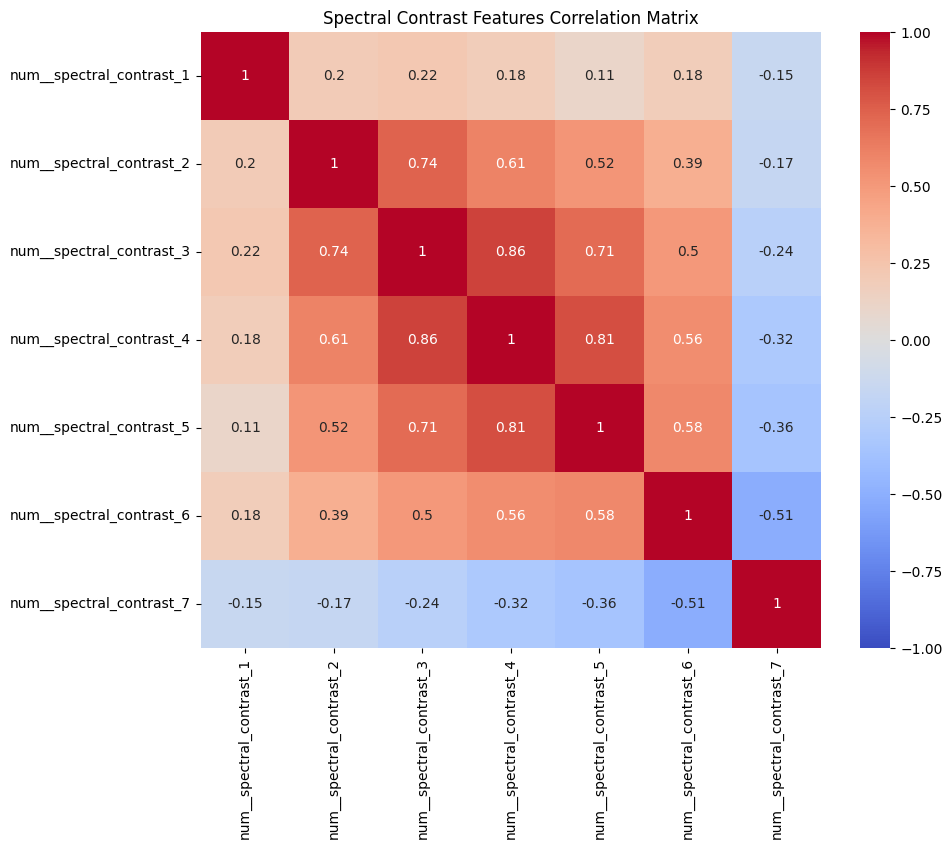

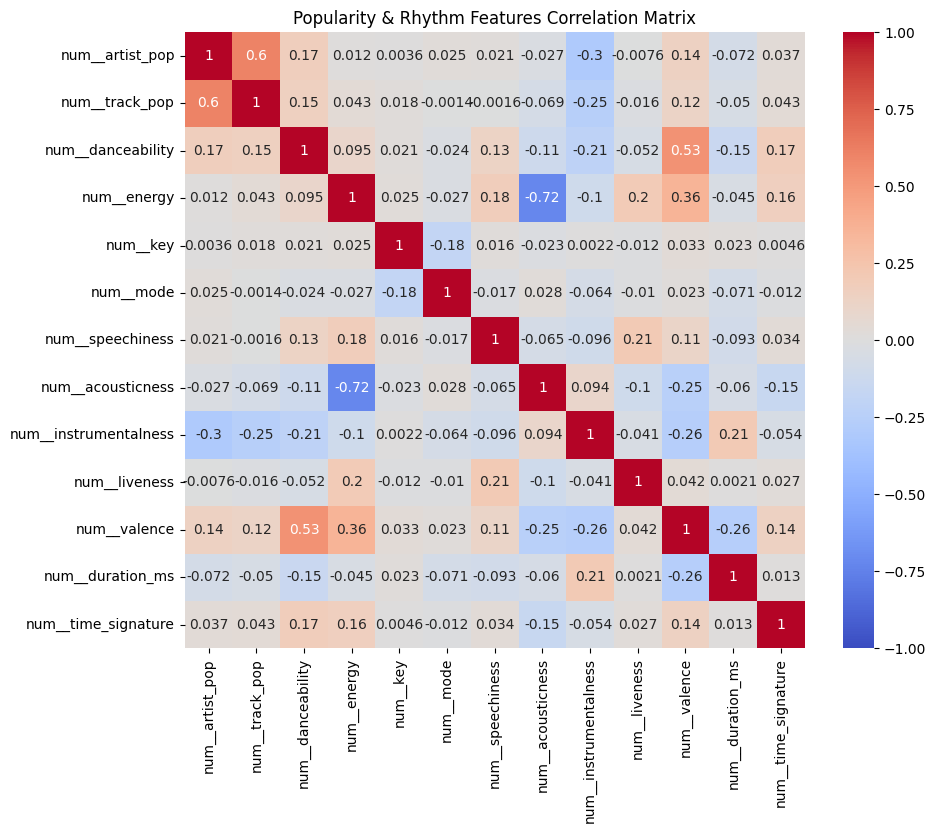

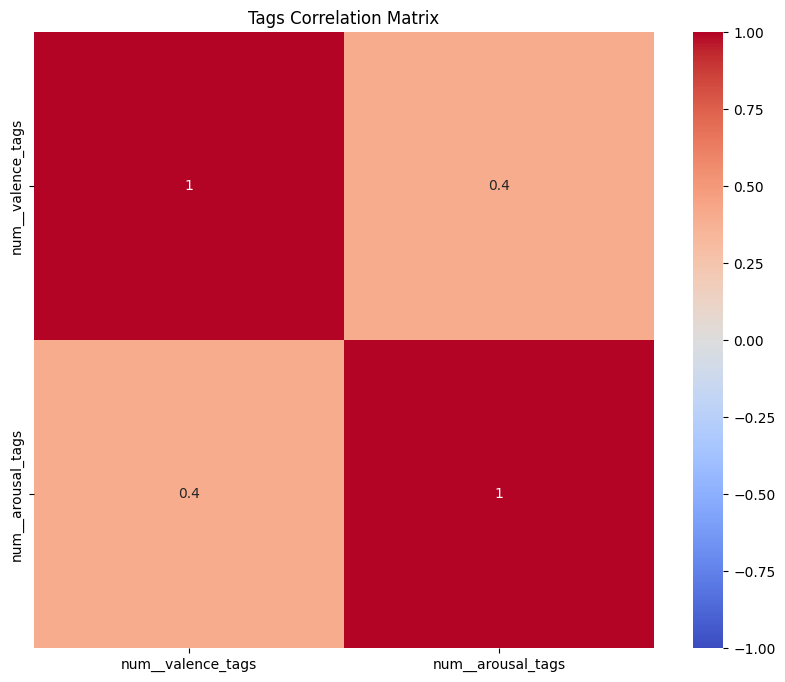

In [18]:
def plot_correlation(df, columns, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Plot each correlation matrix
plot_correlation(X_train_processed, basic_audio_features, 'Basic Audio Features Correlation Matrix')
plot_correlation(X_train_processed, mfcc_features, 'MFCC Features Correlation Matrix')
plot_correlation(X_train_processed, spectral_contrast_features, 'Spectral Contrast Features Correlation Matrix')
plot_correlation(X_train_processed, popularity_rhythm_features, 'Popularity & Rhythm Features Correlation Matrix')
plot_correlation(X_train_processed, tags_genre[:-1], 'Tags Correlation Matrix') 

In [ ]:
def train_and_plot(feature, classifier_model):

    X_feature = X_train[[feature.split('__')[1]]]
    X_feature_processed = X_train_processed[[feature]]


    classifier_model.fit(X_feature_processed, y_train)
    
    # Realizar predicciones
    y_pred = classifier_model.predict(X_feature_processed)
    
    print(classification_report(y_train, y_pred))
    
    # Crear el gráfico de dispersión
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_feature, y_train, c=y_pred, cmap='viridis', label='Datos de entrenamiento')
    plt.title(f'Clasificación: {feature} vs Género')
    plt.xlabel(feature)
    plt.ylabel('Género')
    plt.colorbar(scatter, label='Predicción de Clase')
    plt.legend()
    plt.show()

In [20]:
classifier_model = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(kernel='poly'),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
    ]

In [21]:
lists_of_features = [
    basic_audio_features,
    mfcc_features,
    spectral_contrast_features,
    popularity_rhythm_features,
    tags_genre
]

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       206
           1       0.97      0.93      0.95       404
           2       0.97      1.00      0.99       184
           3       1.00      1.00      1.00       306
           4       1.00      1.00      1.00        21
           5       1.00      0.98      0.99        63
           6       0.98      1.00      0.99       110
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        74
           9       0.97      0.97      0.97        39
          10       1.00      1.00      1.00        38
          11       1.00      0.95      0.97        79
          12       1.00      1.00      1.00        33
          13       1.00      0.98      0.99       122
          14       0.96      1.00      0.98        50
          15       1.00      1.00      1.00       121
          16       1.00      0.99      0.99        97
          17       1.00    

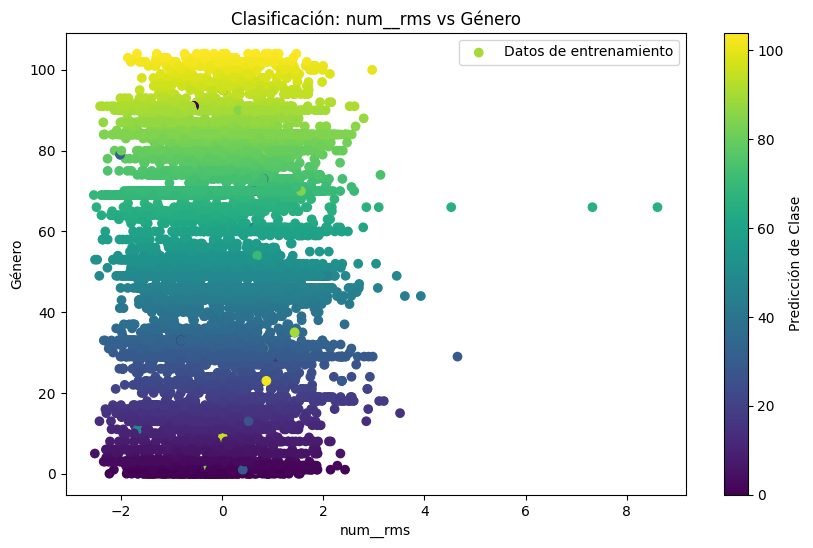

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       206
           1       0.97      0.93      0.95       404
           2       0.97      1.00      0.99       184
           3       1.00      1.00      1.00       306
           4       1.00      1.00      1.00        21
           5       1.00      0.98      0.99        63
           6       0.98      1.00      0.99       110
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        74
           9       0.97      0.95      0.96        39
          10       1.00      1.00      1.00        38
          11       1.00      0.95      0.97        79
          12       1.00      1.00      1.00        33
          13       1.00      0.98      0.99       122
          14       0.96      1.00      0.98        50
          15       1.00      1.00      1.00       121
          16       1.00      0.99      0.99        97
          17       1.00    

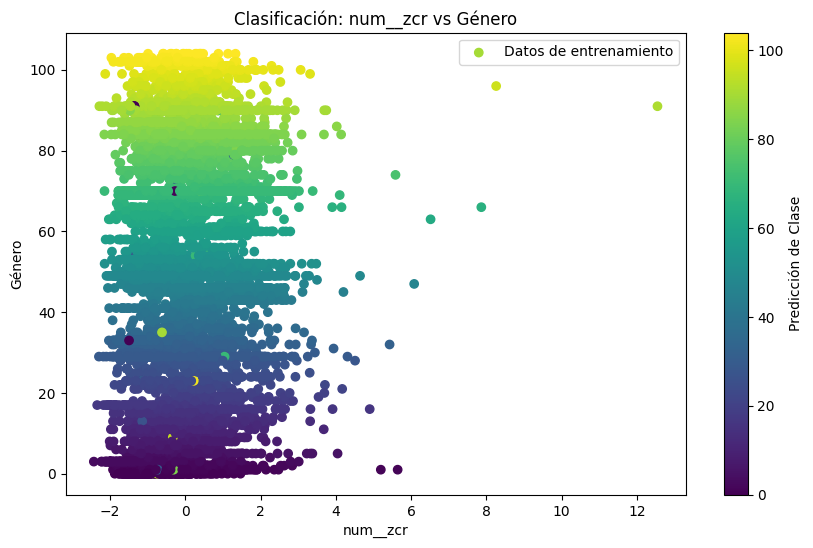

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.12      0.05      0.07       206
           1       1.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.70      0.02      0.04       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.16      0.07      0.10       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       1.00      0.01      0.02       121
          16       0.67      0.02      0.04        97
          17       0.00    

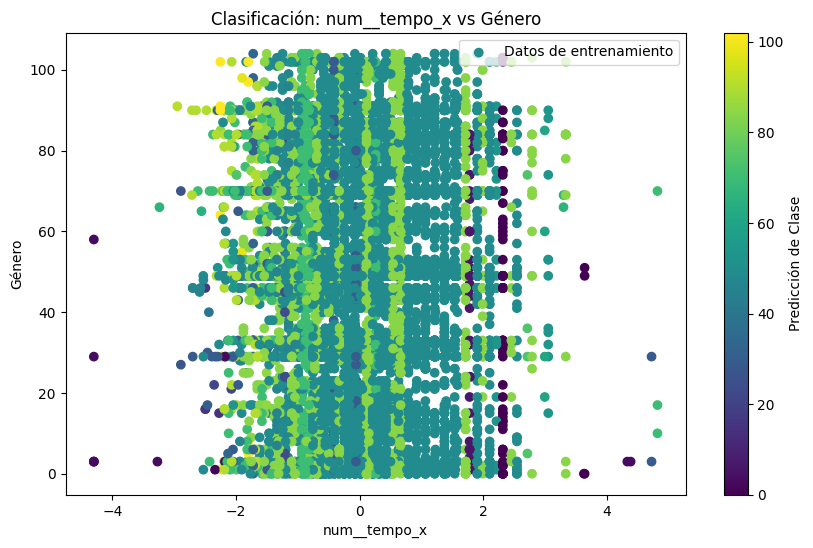

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       206
           1       0.97      0.94      0.95       404
           2       0.97      1.00      0.99       184
           3       1.00      1.00      1.00       306
           4       1.00      1.00      1.00        21
           5       0.98      0.98      0.98        63
           6       0.98      1.00      0.99       110
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        74
           9       0.97      0.97      0.97        39
          10       1.00      1.00      1.00        38
          11       1.00      0.94      0.97        79
          12       1.00      1.00      1.00        33
          13       1.00      0.98      0.99       122
          14       0.96      1.00      0.98        50
          15       1.00      1.00      1.00       121
          16       1.00      0.99      0.99        97
          17       1.00    

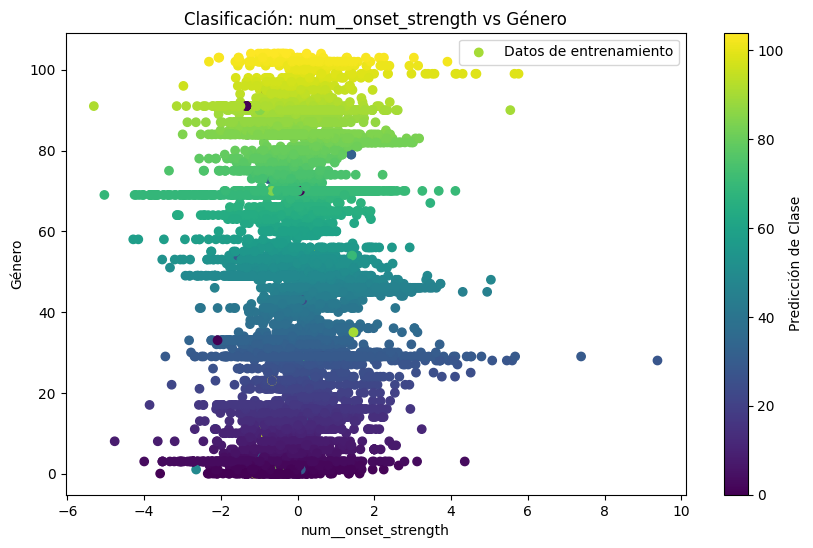

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       206
           1       0.89      0.83      0.86       404
           2       0.88      0.92      0.90       184
           3       0.93      0.89      0.91       306
           4       0.95      0.95      0.95        21
           5       0.87      0.92      0.89        63
           6       0.92      0.94      0.93       110
           7       0.82      0.78      0.80        18
           8       0.93      0.92      0.93        74
           9       0.92      0.87      0.89        39
          10       1.00      0.92      0.96        38
          11       0.83      0.78      0.81        79
          12       0.91      0.94      0.93        33
          13       0.89      0.93      0.91       122
          14       0.82      0.92      0.87        50
          15       0.94      0.93      0.94       121
          16       0.88      0.88      0.88        97
          17       0.94    

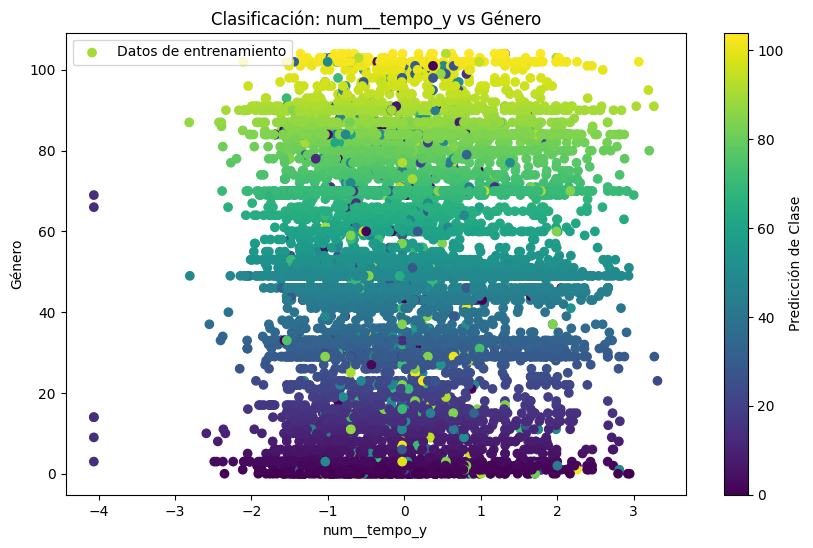

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       206
           1       0.66      0.68      0.67       404
           2       0.61      0.68      0.64       184
           3       0.84      0.84      0.84       306
           4       0.94      0.71      0.81        21
           5       0.66      0.52      0.58        63
           6       0.87      0.82      0.84       110
           7       0.94      0.89      0.91        18
           8       0.69      0.68      0.68        74
           9       0.61      0.64      0.62        39
          10       0.81      0.79      0.80        38
          11       0.71      0.65      0.68        79
          12       0.59      0.67      0.63        33
          13       0.72      0.70      0.71       122
          14       0.77      0.74      0.76        50
          15       0.72      0.64      0.68       121
          16       0.72      0.75      0.73        97
          17       0.94    

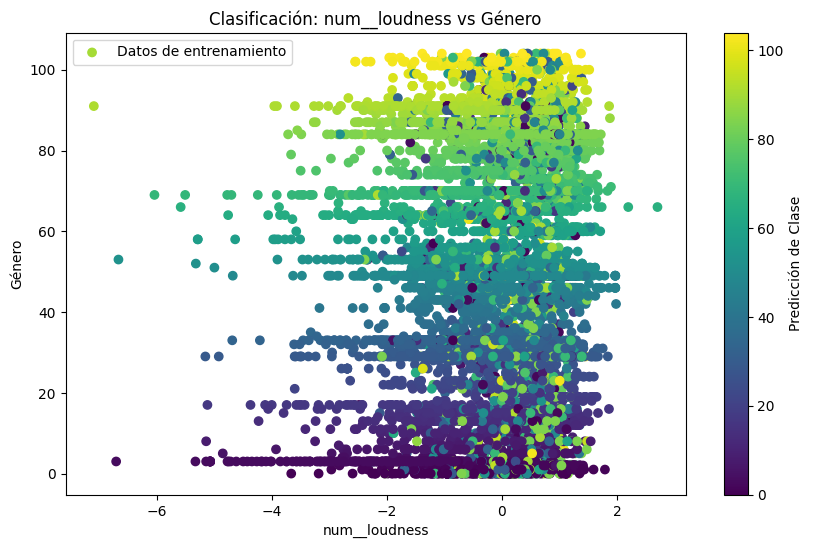

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.11      0.13      0.12       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

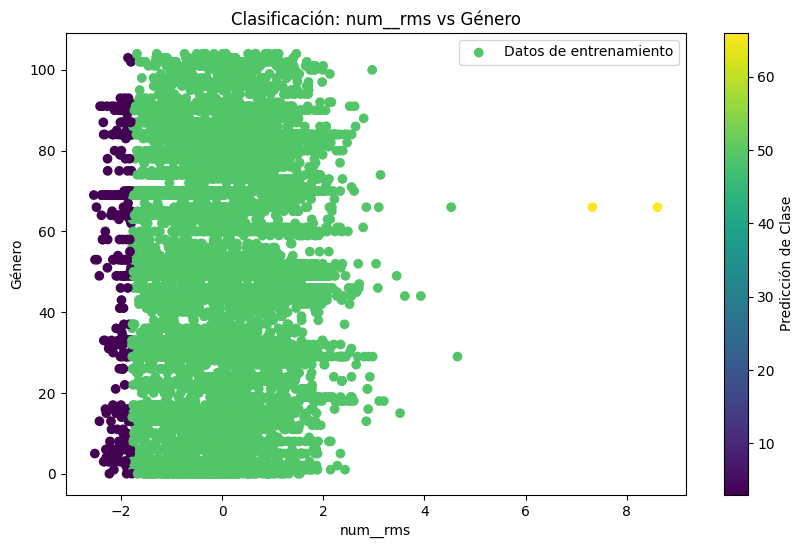

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.00      0.00      0.00       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

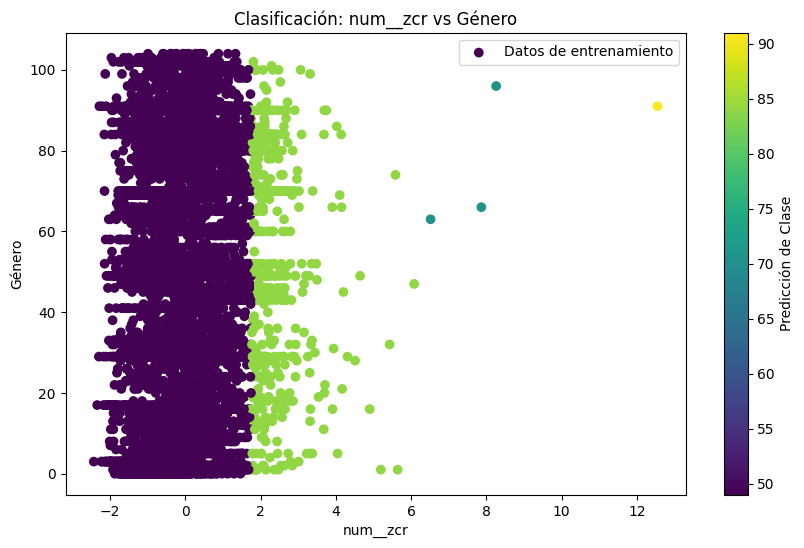

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.00      0.00      0.00       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

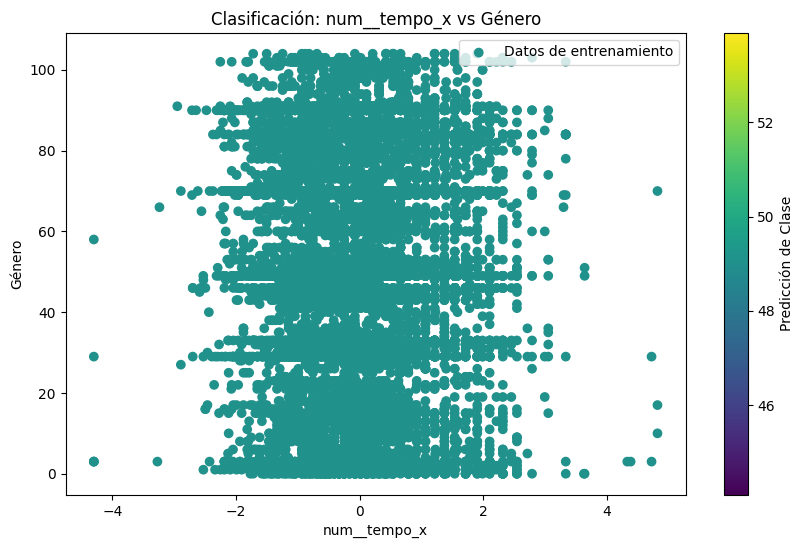

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.30      0.09      0.14       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

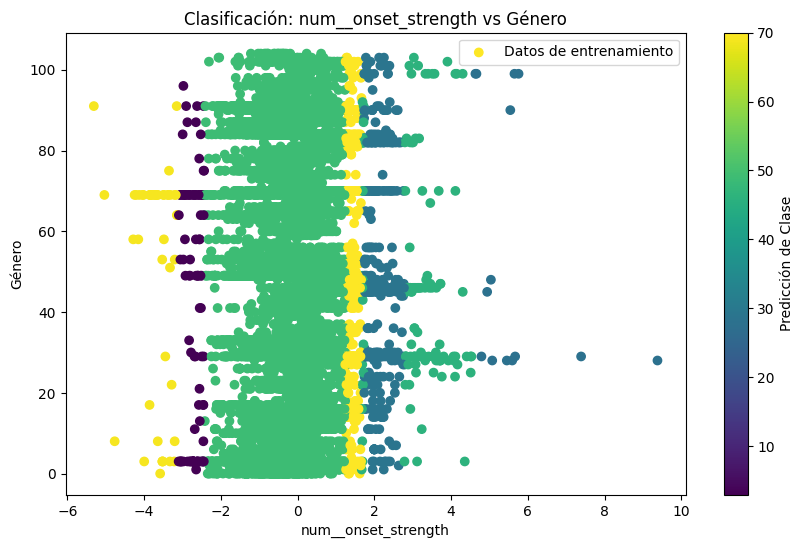

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.00      0.00      0.00       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

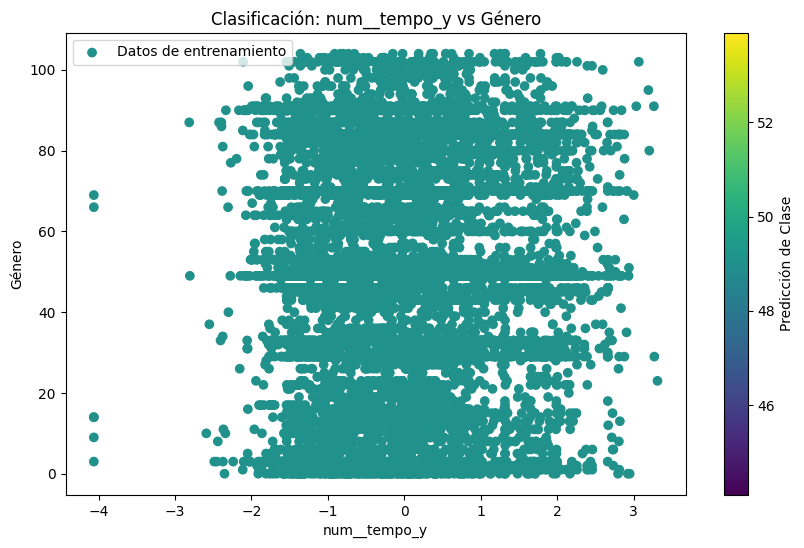

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.21      0.23      0.22       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

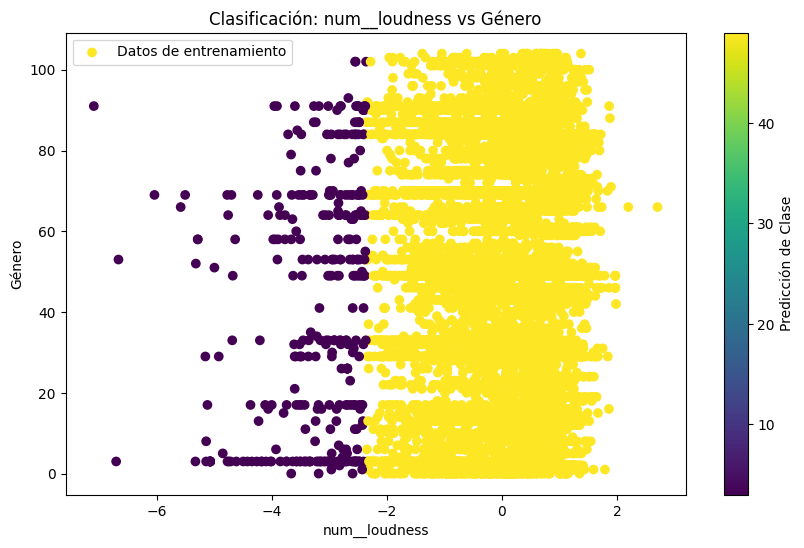

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

              precision    recall  f1-score   support

           0       0.47      0.14      0.21       206
           1       0.11      0.01      0.02       404
           2       0.00      0.00      0.00       184
           3       0.16      0.10      0.12       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.17      0.29      0.21       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

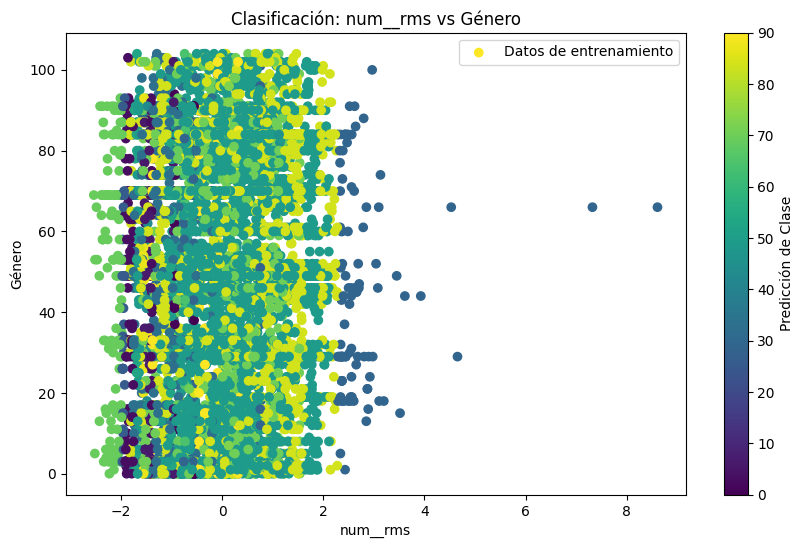

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

              precision    recall  f1-score   support

           0       0.44      0.13      0.20       206
           1       0.12      0.01      0.03       404
           2       0.00      0.00      0.00       184
           3       0.19      0.24      0.21       306
           4       0.00      0.00      0.00        21
           5       0.08      0.06      0.07        63
           6       0.25      0.22      0.23       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

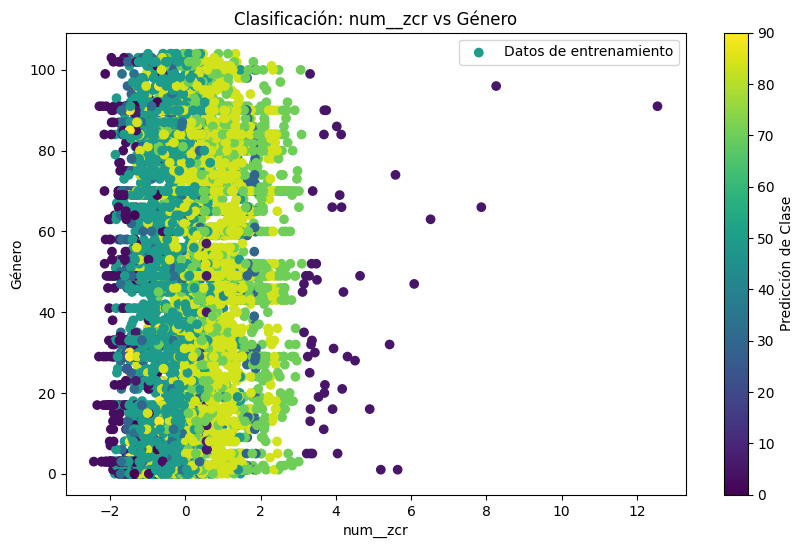

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:09:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

              precision    recall  f1-score   support

           0       0.12      0.05      0.07       206
           1       1.00      0.00      0.00       404
           2       0.13      0.05      0.08       184
           3       0.67      0.03      0.05       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.17      0.11      0.13       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       1.00      0.01      0.02       121
          16       0.67      0.02      0.04        97
          17       0.00    

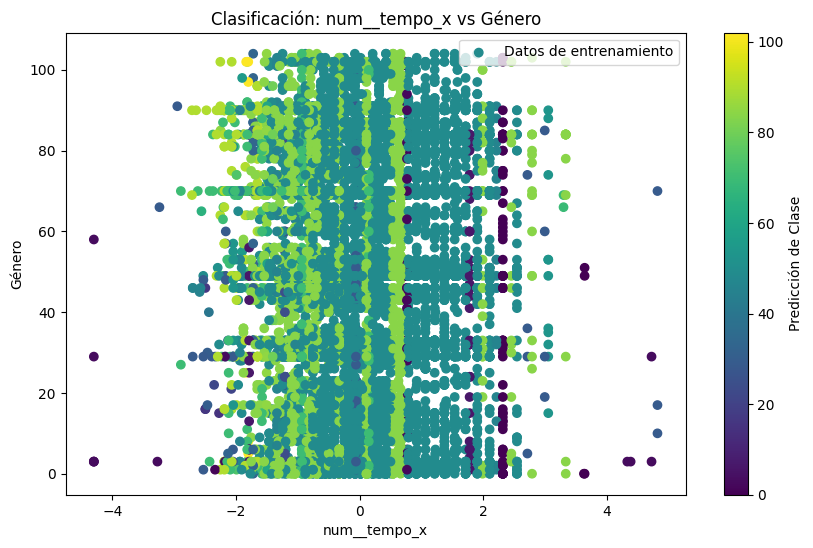

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:09:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

              precision    recall  f1-score   support

           0       0.25      0.17      0.21       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.20      0.22      0.21       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.26      0.23      0.24       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

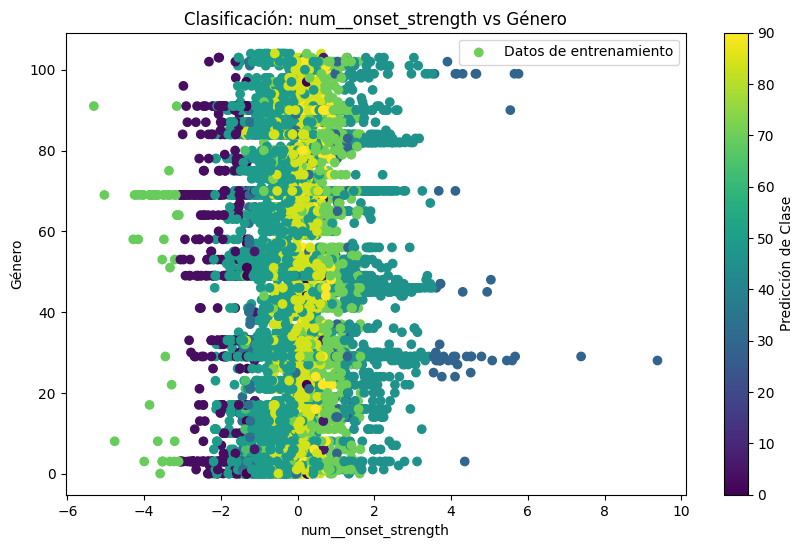

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:09:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

              precision    recall  f1-score   support

           0       0.25      0.16      0.19       206
           1       0.13      0.03      0.05       404
           2       0.00      0.00      0.00       184
           3       0.15      0.17      0.16       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.20      0.28      0.23       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

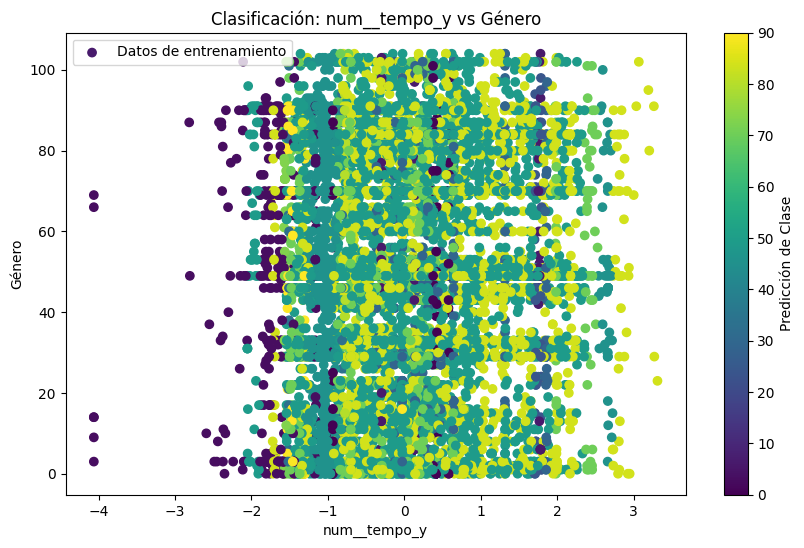

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:09:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

              precision    recall  f1-score   support

           0       0.46      0.13      0.20       206
           1       0.16      0.04      0.06       404
           2       0.00      0.00      0.00       184
           3       0.19      0.38      0.25       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.20      0.28      0.24       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

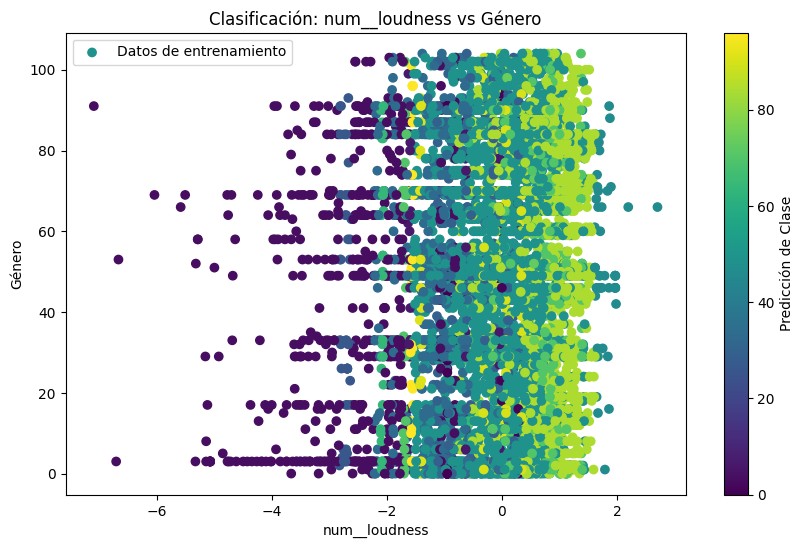

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.09      0.17      0.12       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

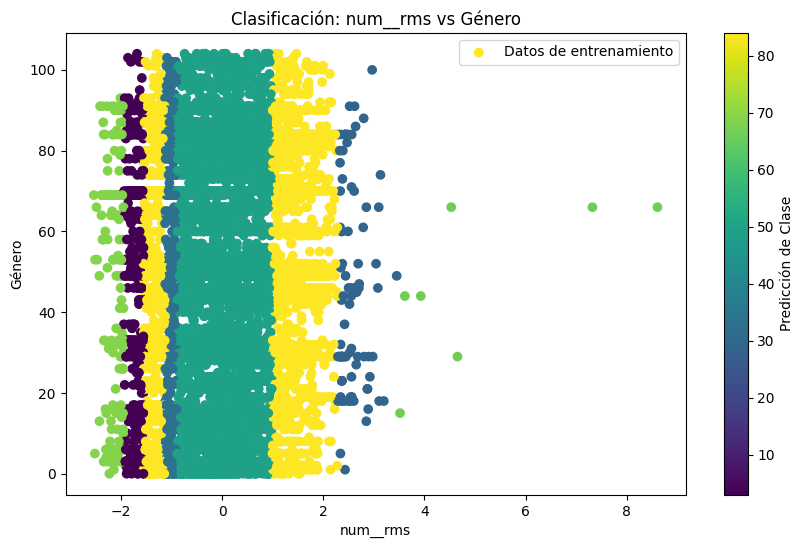

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.18      0.25      0.21       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

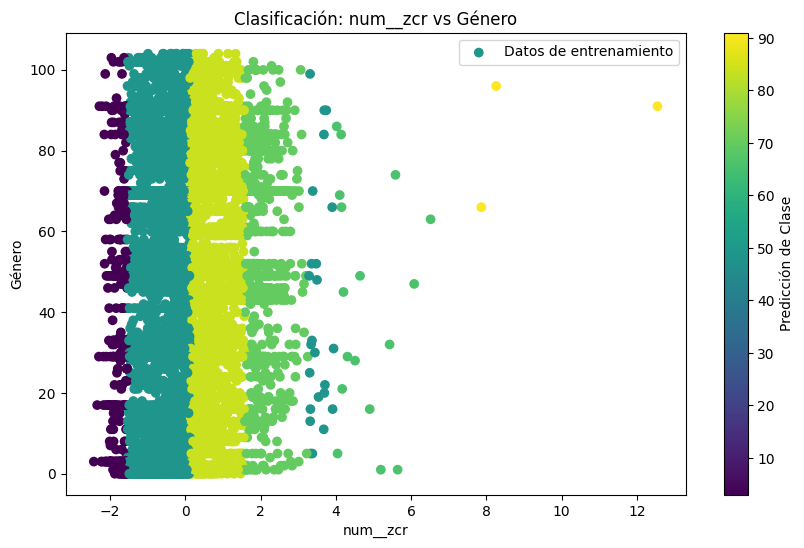

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.32      0.02      0.04       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

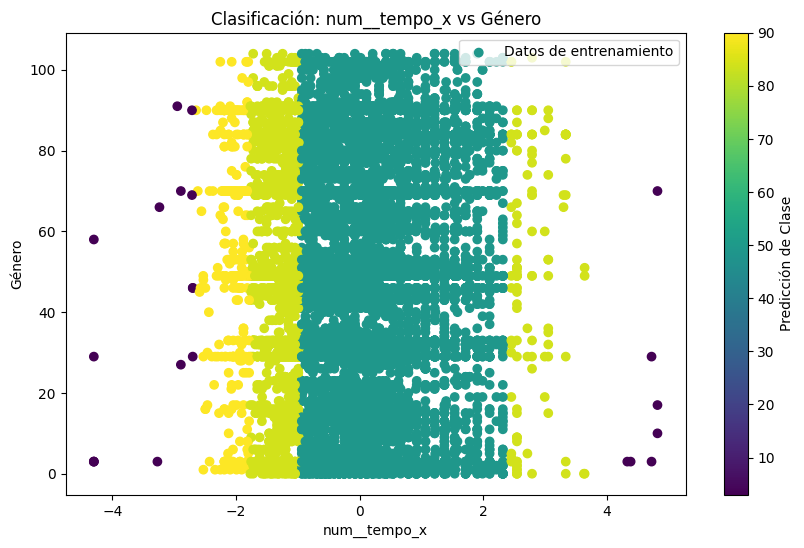

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.17      0.18      0.17       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

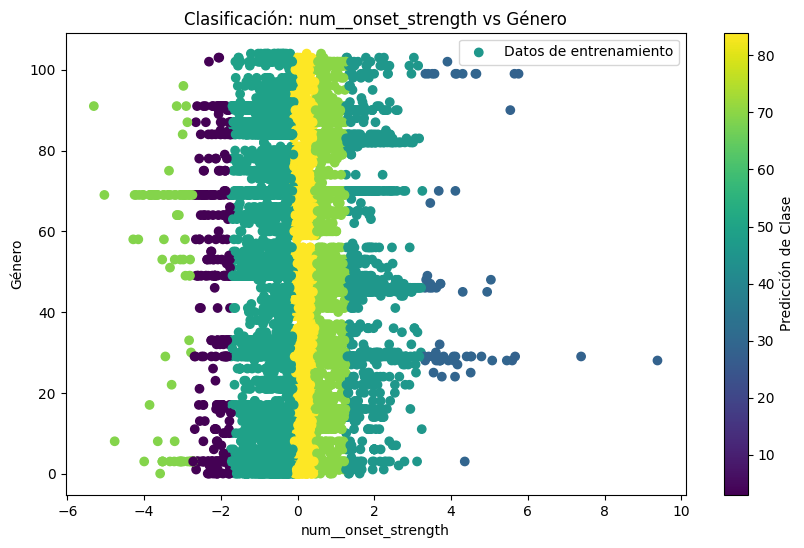

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.13      0.07      0.09       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.33      0.04      0.07        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

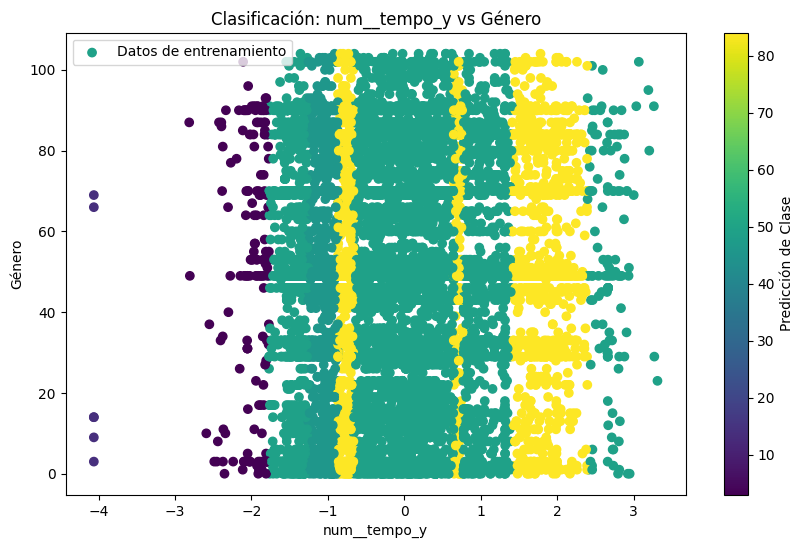

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.17      0.36      0.23       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

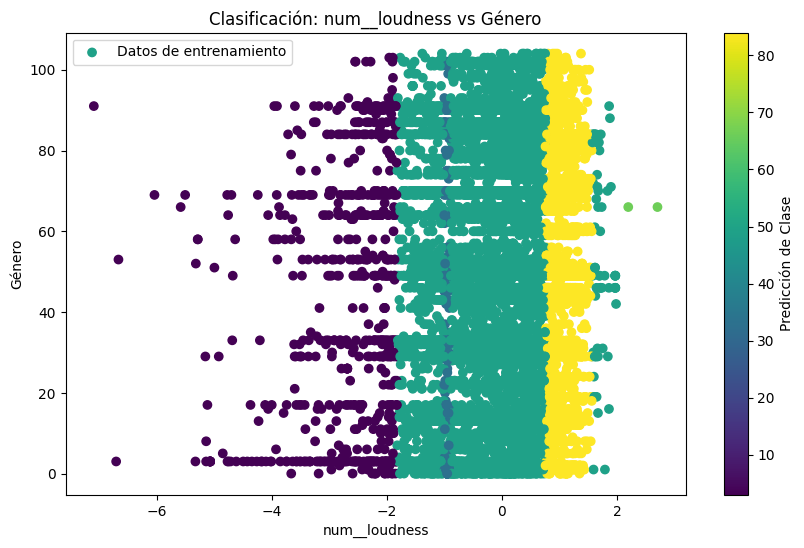

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       206
           1       0.97      0.93      0.95       404
           2       0.97      1.00      0.99       184
           3       1.00      1.00      1.00       306
           4       1.00      1.00      1.00        21
           5       1.00      0.98      0.99        63
           6       0.98      1.00      0.99       110
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        74
           9       0.97      0.97      0.97        39
          10       1.00      1.00      1.00        38
          11       1.00      0.95      0.97        79
          12       1.00      1.00      1.00        33
          13       1.00      0.98      0.99       122
          14       0.96      1.00      0.98        50
          15       1.00      1.00      1.00       121
          16       1.00      0.99      0.99        97
          17       1.00    

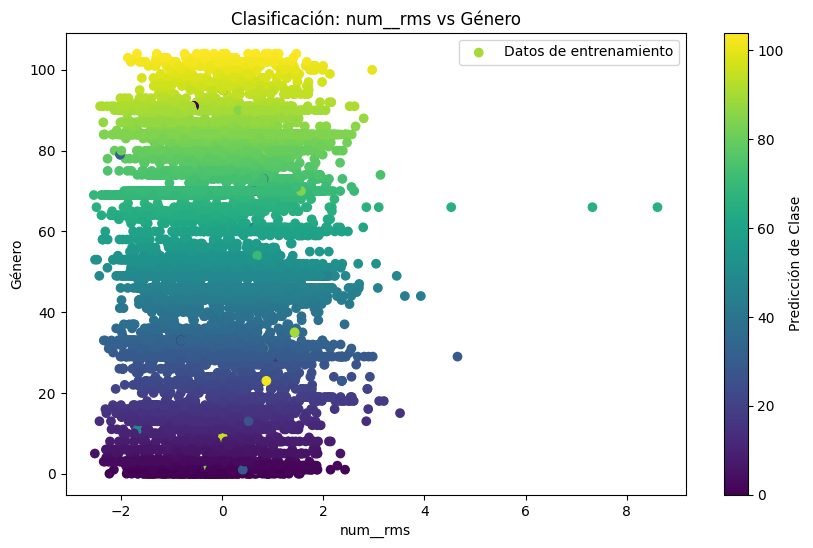

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       206
           1       0.97      0.93      0.95       404
           2       0.97      1.00      0.99       184
           3       1.00      1.00      1.00       306
           4       1.00      1.00      1.00        21
           5       1.00      0.98      0.99        63
           6       0.98      1.00      0.99       110
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        74
           9       0.97      0.95      0.96        39
          10       1.00      1.00      1.00        38
          11       1.00      0.95      0.97        79
          12       1.00      1.00      1.00        33
          13       1.00      0.98      0.99       122
          14       0.96      1.00      0.98        50
          15       1.00      1.00      1.00       121
          16       1.00      0.99      0.99        97
          17       1.00    

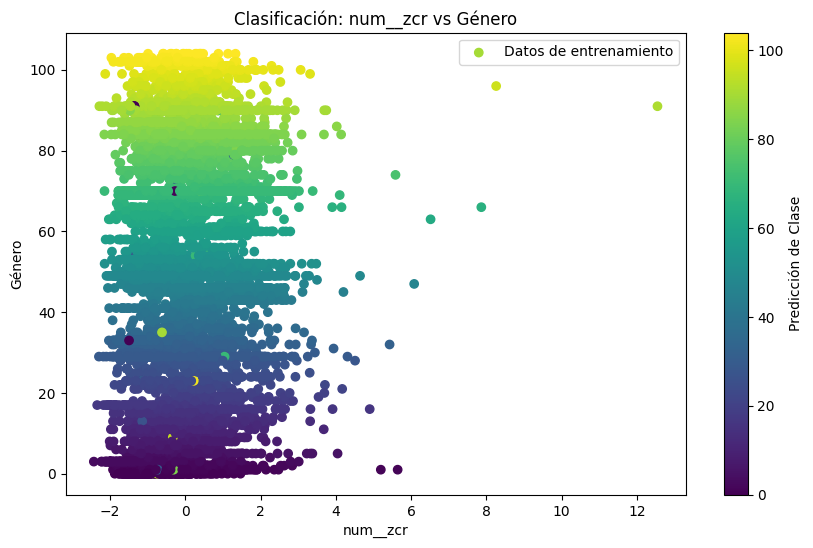

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.12      0.05      0.07       206
           1       1.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.70      0.02      0.04       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.16      0.07      0.10       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       1.00      0.01      0.02       121
          16       0.67      0.02      0.04        97
          17       0.00    

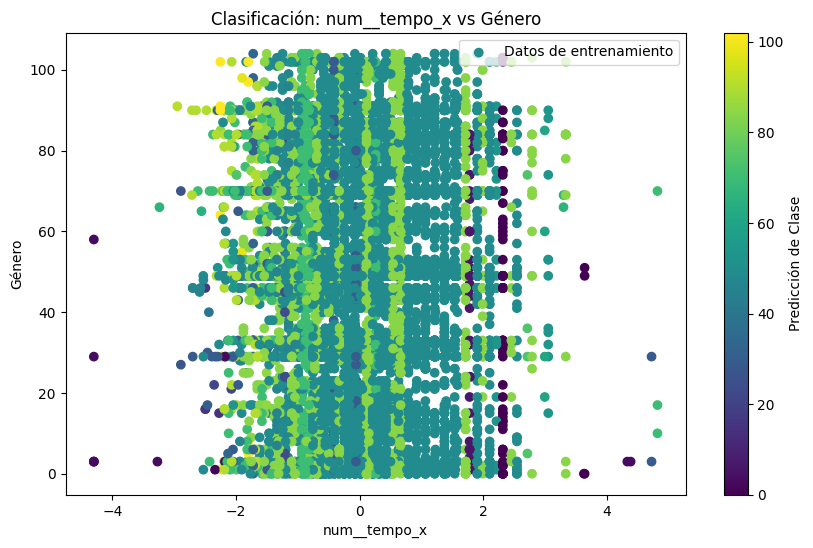

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       206
           1       0.97      0.94      0.95       404
           2       0.97      1.00      0.99       184
           3       1.00      1.00      1.00       306
           4       1.00      1.00      1.00        21
           5       0.98      0.98      0.98        63
           6       0.98      1.00      0.99       110
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        74
           9       0.97      0.97      0.97        39
          10       1.00      1.00      1.00        38
          11       1.00      0.94      0.97        79
          12       1.00      1.00      1.00        33
          13       1.00      0.98      0.99       122
          14       0.96      1.00      0.98        50
          15       1.00      1.00      1.00       121
          16       1.00      0.99      0.99        97
          17       1.00    

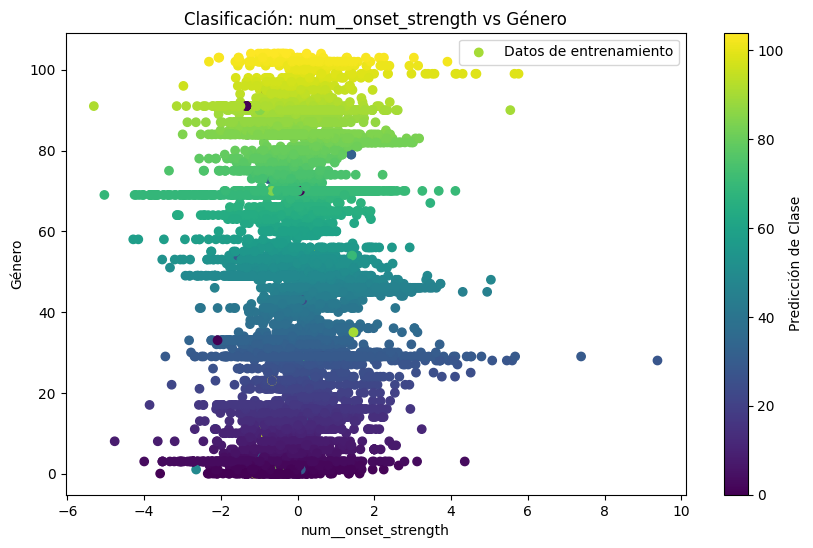

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       206
           1       0.89      0.83      0.86       404
           2       0.88      0.92      0.90       184
           3       0.93      0.89      0.91       306
           4       0.95      0.95      0.95        21
           5       0.87      0.92      0.89        63
           6       0.92      0.94      0.93       110
           7       0.82      0.78      0.80        18
           8       0.93      0.92      0.93        74
           9       0.92      0.87      0.89        39
          10       1.00      0.92      0.96        38
          11       0.83      0.78      0.81        79
          12       0.91      0.94      0.93        33
          13       0.89      0.93      0.91       122
          14       0.82      0.92      0.87        50
          15       0.94      0.93      0.94       121
          16       0.88      0.88      0.88        97
          17       0.94    

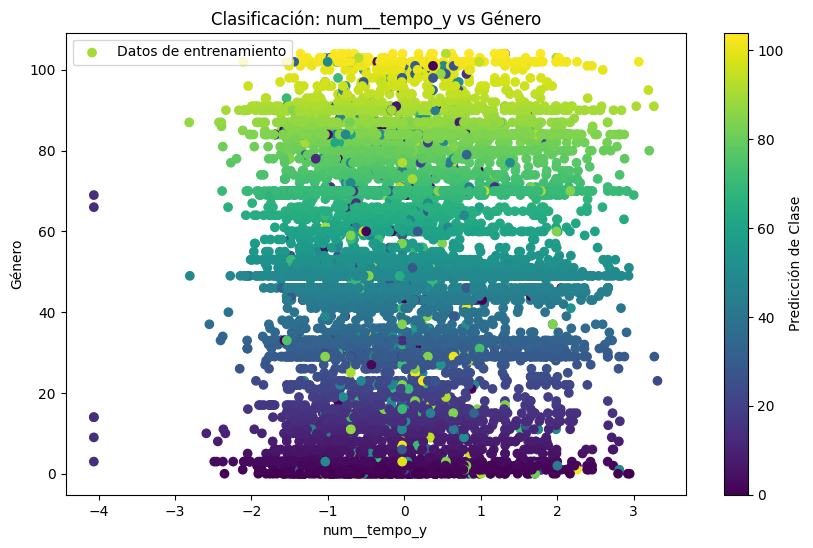

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       206
           1       0.66      0.68      0.67       404
           2       0.61      0.68      0.64       184
           3       0.84      0.84      0.84       306
           4       0.94      0.71      0.81        21
           5       0.66      0.52      0.58        63
           6       0.87      0.82      0.84       110
           7       0.94      0.89      0.91        18
           8       0.69      0.68      0.68        74
           9       0.61      0.64      0.62        39
          10       0.81      0.79      0.80        38
          11       0.71      0.65      0.68        79
          12       0.59      0.67      0.63        33
          13       0.72      0.70      0.71       122
          14       0.77      0.74      0.76        50
          15       0.72      0.64      0.68       121
          16       0.72      0.75      0.73        97
          17       0.94    

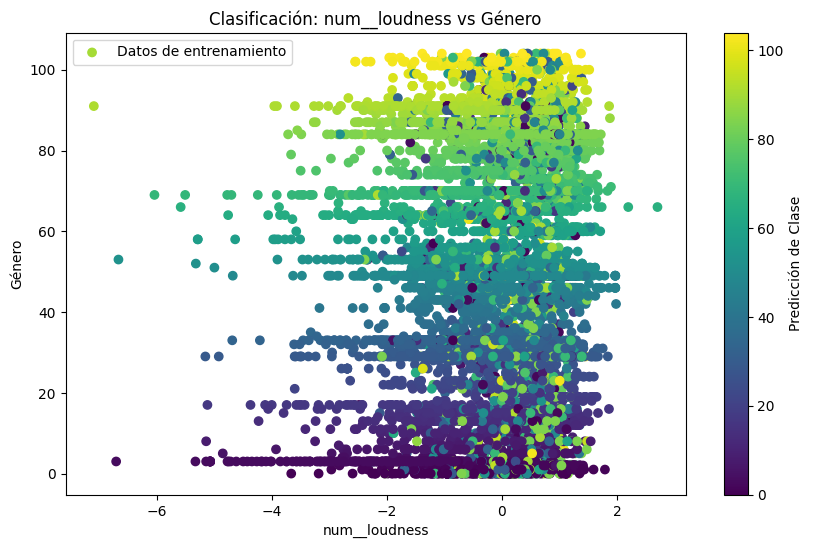

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.11      0.13      0.12       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

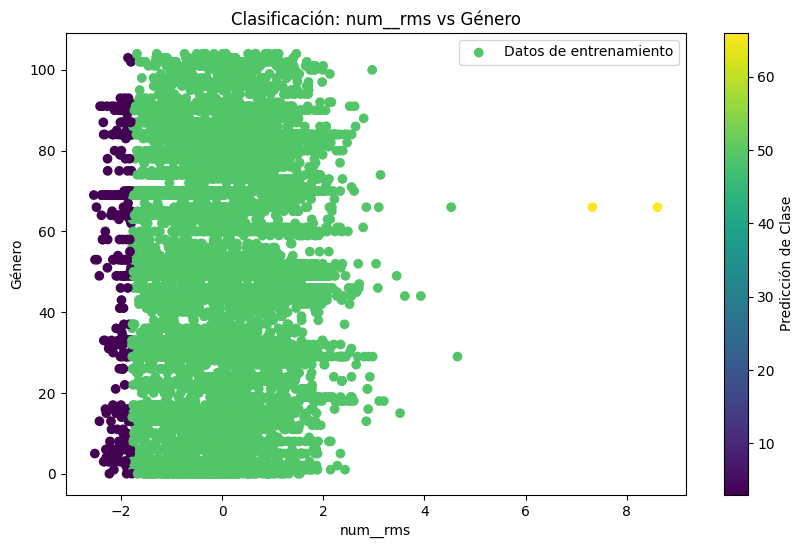

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.00      0.00      0.00       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

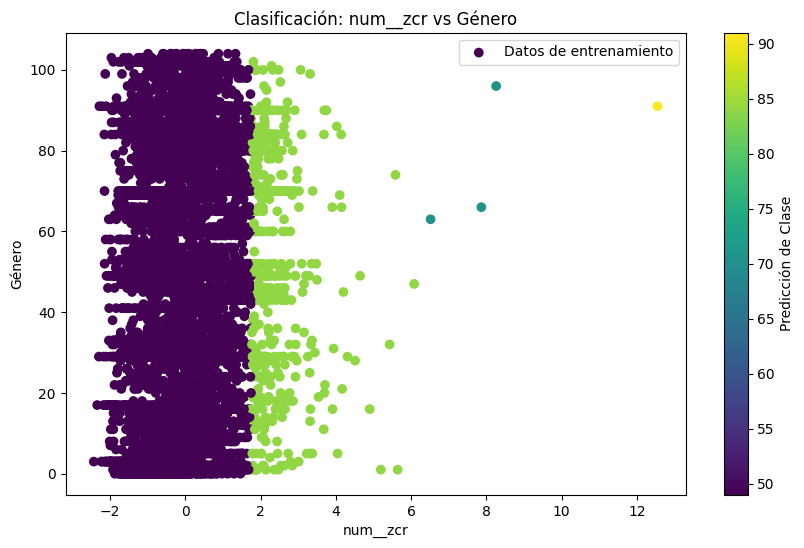

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.00      0.00      0.00       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

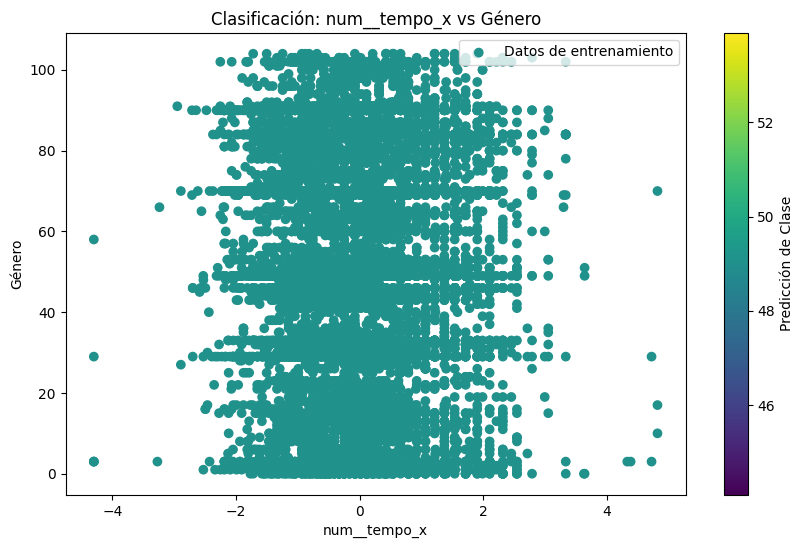

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.30      0.09      0.14       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

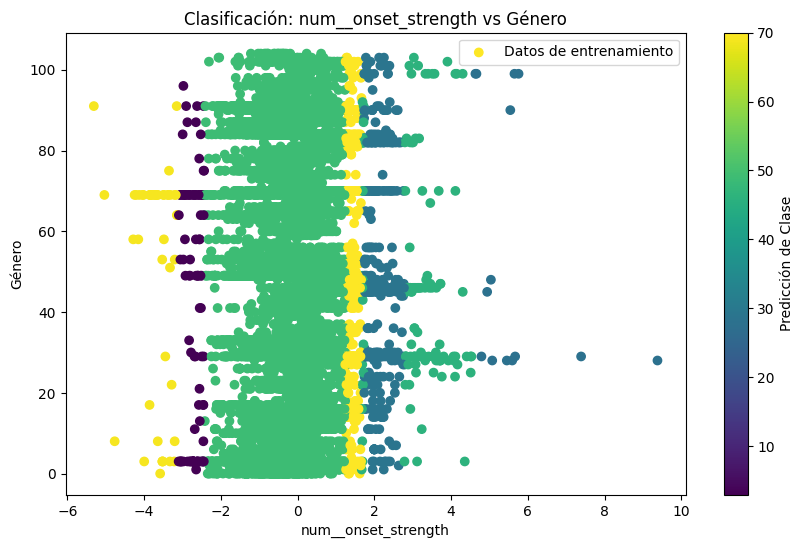

/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linky/Proyects/Spotipy/download-data-spotify/FinalDataset/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       184
           3       0.00      0.00      0.00       306
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00       122
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00        97
          17       0.00    

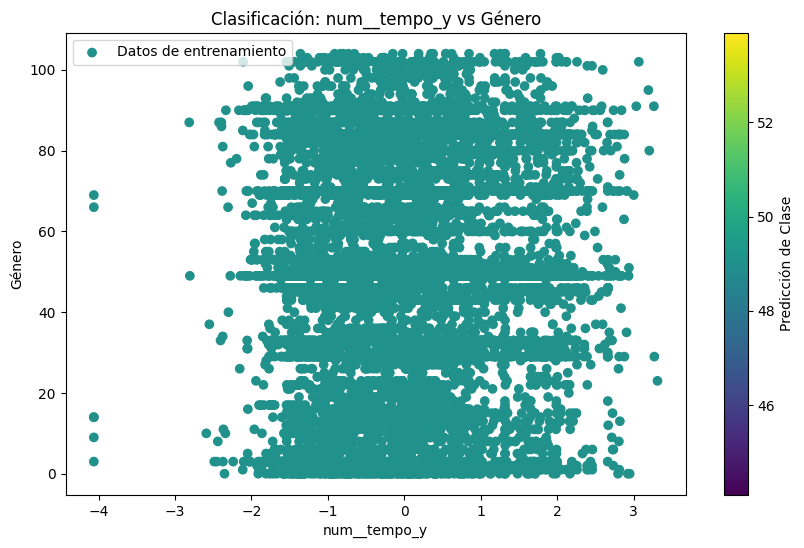

In [ ]:
for list_of_features in lists_of_features:
    for model in classifier_model:
        for feature in basic_audio_features:
            train_and_plot(feature, model)